In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data = pd.read_csv('‪D:\Data\UCI Datasets\winequality-red.csv',sep = ';')
data = pd.read_csv('D:\Data\UCI_Datasets\winequality-red.csv',sep = ';')

In [3]:
data.shape

(1599, 12)

In [4]:
data.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [6]:
data.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [7]:
features = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
target = ['quality']

In [8]:
import warnings
warnings.filterwarnings('ignore')

### most correlated features

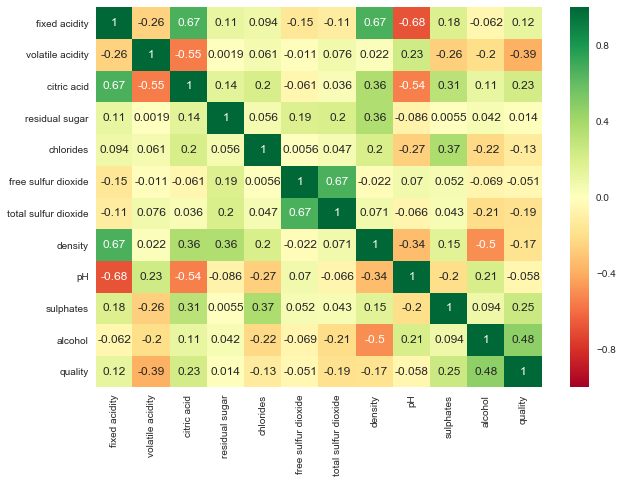

In [9]:
import seaborn as sns
corrmat = data.corr()
plt.figure(figsize = (10,7))
# or fig, ax = plt.subplots(figsize=(20, 10))
#top_corr_features = corrmat.index[abs(corrmat["quality"])>0.2]
g = sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [10]:
corrmat.sort_values(["quality"], ascending = False, inplace = True)
print(corrmat.quality)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Alchol contributes highest to the quality of a fine wine and volatile acidity negatively affects the wine quality

In [11]:
print("NAs for features in whole data : " + str(data.isnull().values.sum()))

NAs for features in whole data : 0


## Skewness

In [12]:
from scipy.stats import skew 
skewness = data.apply(lambda x:skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.5]
skewness

fixed acidity           0.981829
volatile acidity        0.670962
residual sugar          4.536395
chlorides               5.675017
free sulfur dioxide     1.249394
total sulfur dioxide    1.514109
sulphates               2.426393
alcohol                 0.860021
dtype: float64

In [13]:
skew_features = data[skewness.index]
skew_features[:2]

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.70,1.9,0.076,11.0,34.0,0.56,9.4
1,7.8,0.88,2.6,0.098,25.0,67.0,0.68,9.8


In [14]:
skew_features  = np.log1p(skew_features)


In [15]:
data[skew_features.columns] = skew_features

In [16]:
print("NAs for numerical features in data : " + str(data.isnull().values.sum()))


NAs for numerical features in data : 0


In [17]:
from sklearn.model_selection import train_test_split # to split the data into two parts
train, test = train_test_split(data,random_state = 0)
#Fill the training and test data with require information
X_train = train[features] 
y_train = train[target]
X_test = test[features]
y_test = test[target]


## With Standard Features Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_x_std = sc.fit_transform(X_train)
test_x_std = sc.transform(X_test)


## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

clf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10)))).fit(X_train, y_train)

print("Best C :", clf.C_)
print('Wine dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

('Best C :', array([  1.00000000e+02,   1.00000000e+03,   1.00000000e+03,
         1.00000000e-10,   1.00000000e+01,   1.00000000e-10]))
Wine dataset
Accuracy of Logistic regression classifier on training set: 0.59
Accuracy of Logistic regression classifier on test set: 0.61


In [20]:
print('Logistic regression: effect of C regularization parameter\n')
for this_c in [0.1, 1, 100,500,1000]:
    linridge = LogisticRegression(C = this_c).fit(train_x_std, y_train)
    r2_train = linridge.score(train_x_std, y_train)
    r2_test = linridge.score(test_x_std, y_test)
    print('C = {:.2f}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_c, r2_train, r2_test))

Logistic regression: effect of C regularization parameter

C = 0.10, r-squared training: 0.55, r-squared test: 0.60

C = 1.00, r-squared training: 0.59, r-squared test: 0.61

C = 100.00, r-squared training: 0.60, r-squared test: 0.62

C = 500.00, r-squared training: 0.60, r-squared test: 0.62

C = 1000.00, r-squared training: 0.60, r-squared test: 0.62



In [21]:
clf.predict([ 0.25892857,  0.21232877,  0.29      ,  0.08219178,  0.10517529,
        0.25352113,  0.21201413,  0.52202643,  0.51968504,  0.16564417,
        0.16923077])

C:\Users\jinda\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([5], dtype=int64)

## Linear SVC

In [22]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(train_x_std, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(train_x_std, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(test_x_std, y_test)))
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Accuracy of Linear SVC classifier on training set: 0.59
Accuracy of Linear SVC classifier on test set: 0.61
('Coefficients:\n', array([[ 0.12510262,  0.6438307 , -0.16806602,  0.10429511,  0.49907231,
         0.14243754, -0.47366326,  0.01446453,  0.19433018, -0.14945462,
        -0.13597885],
       [ 0.2675533 ,  0.60661131,  0.17809617,  0.24537267,  0.15241345,
         0.09585201, -0.29665046, -0.44093785,  0.47540063, -0.06595052,
        -0.29394834],
       [-0.98511448,  0.87603469,  0.41031318, -0.31870655,  0.4751926 ,
        -0.68987766,  1.27797991,  0.61499308, -0.3488291 , -1.56046401,
        -1.71132936],
       [-0.35889485, -0.86762877, -0.67914706, -0.69964687, -0.10007764,
         0.48859524, -0.5866665 ,  1.24160207, -0.54106276,  0.47451964,
         1.12306159],
       [ 1.06012527, -1.26646935, -0.11704457,  0.92701817, -0.75511807,
         0.38317293, -0.83361653, -1.10158877,  0.54023158,  1.38353548,
         0.9607674 ],
       [-0.38123162,  0.08407232

In [23]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Kernalized SVC

In [24]:
from sklearn.svm import SVC
# Support Vector Classifier: RBF kernel
clf = SVC().fit(train_x_std, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(train_x_std, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(test_x_std, y_test)))

Accuracy of Linear SVC classifier on training set: 0.57
Accuracy of Linear SVC classifier on test set: 0.59


In [25]:
# Support Vector Classifier: Poly kernel
clf = SVC(kernel = 'poly', degree = 3).fit(train_x_std, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(train_x_std, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(test_x_std, y_test)))

Accuracy of Linear SVC classifier on training set: 0.43
Accuracy of Linear SVC classifier on test set: 0.42


In [26]:
print('SVC RBF: effect of  regularization parameter gamma\n')
for this_gamma in [0.01, 1, 10,50,100,120,150]:
    clf = SVC(    kernel = 'rbf', gamma=this_gamma).fit(train_x_std, y_train)
    r2_train = clf.score(train_x_std, y_train)
    r2_test = clf.score(test_x_std, y_test)
    print('Gamma = {:.2f}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_gamma, r2_train, r2_test))


SVC RBF: effect of  regularization parameter gamma

Gamma = 0.01, r-squared training: 0.43, r-squared test: 0.43

Gamma = 1.00, r-squared training: 0.62, r-squared test: 0.62

Gamma = 10.00, r-squared training: 0.74, r-squared test: 0.62

Gamma = 50.00, r-squared training: 0.96, r-squared test: 0.66

Gamma = 100.00, r-squared training: 0.99, r-squared test: 0.62

Gamma = 120.00, r-squared training: 0.99, r-squared test: 0.59

Gamma = 150.00, r-squared training: 1.00, r-squared test: 0.58



In [27]:
print('SVC RBF: effect of  regularization parameter gamma and C \n')
for this_gamma in [1, 10,50,100]:
    for this_C in [0.1, 1, 15]:
        
        clf = SVC(    kernel = 'rbf', gamma=this_gamma, C = this_C).fit(train_x_std, y_train)
        r2_train = clf.score(train_x_std, y_train)
        r2_test = clf.score(test_x_std, y_test)
        print('Gamma = {:.2f},C = {:.2f} \
        r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_gamma,this_C, r2_train, r2_test))

SVC RBF: effect of  regularization parameter gamma and C 

Gamma = 1.00,C = 0.10         r-squared training: 0.57, r-squared test: 0.60

Gamma = 1.00,C = 1.00         r-squared training: 0.62, r-squared test: 0.62

Gamma = 1.00,C = 15.00         r-squared training: 0.68, r-squared test: 0.61

Gamma = 10.00,C = 0.10         r-squared training: 0.60, r-squared test: 0.60

Gamma = 10.00,C = 1.00         r-squared training: 0.74, r-squared test: 0.62

Gamma = 10.00,C = 15.00         r-squared training: 0.96, r-squared test: 0.65

Gamma = 50.00,C = 0.10         r-squared training: 0.43, r-squared test: 0.42

Gamma = 50.00,C = 1.00         r-squared training: 0.96, r-squared test: 0.66

Gamma = 50.00,C = 15.00         r-squared training: 1.00, r-squared test: 0.66

Gamma = 100.00,C = 0.10         r-squared training: 0.43, r-squared test: 0.42

Gamma = 100.00,C = 1.00         r-squared training: 0.99, r-squared test: 0.62

Gamma = 100.00,C = 15.00         r-squared training: 1.00, r-squared t

## Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

for this_depth in [2,4,8,16,20,25,26,27,28]:
    clf = DecisionTreeClassifier(max_depth = this_depth)
    dtree = clf.fit(X_train,y_train)
    print('Max depth: {:.2f} R Squared train data: {:.2f}, R Squared test data {:.2f}\n'.format(this_depth,dtree.score(X_train,y_train),dtree.score(X_test,y_test)))
    

Max depth: 2.00 R Squared train data: 0.55, R Squared test data 0.53

Max depth: 4.00 R Squared train data: 0.61, R Squared test data 0.56

Max depth: 8.00 R Squared train data: 0.77, R Squared test data 0.58

Max depth: 16.00 R Squared train data: 0.99, R Squared test data 0.62

Max depth: 20.00 R Squared train data: 1.00, R Squared test data 0.62

Max depth: 25.00 R Squared train data: 1.00, R Squared test data 0.60

Max depth: 26.00 R Squared train data: 1.00, R Squared test data 0.64

Max depth: 27.00 R Squared train data: 1.00, R Squared test data 0.62

Max depth: 28.00 R Squared train data: 1.00, R Squared test data 0.65

